<a href="https://colab.research.google.com/github/manuelmariscal/MCAP/blob/main/MDD_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 1. Carga y Partición de Datos ---
Dataset 'Advertising.csv' cargado.
Datos de entrenamiento: 140 (70%)
Datos de testing: 60 (30%)

--- 2. Entrenando el modelo con matemática cruda ---
Modelo ajustado. Parámetros encontrados:
  - Intersección (α): 2.8817
  - Coeficiente para TV (β1): 0.0467
  - Coeficiente para Radio (β2): 0.1844
Modelo final: Sales = 2.8817 + 0.0467*TV + 0.1844*Radio

--- 3. Evaluando el ajuste en los datos de entrenamiento ---
Coeficiente de Determinación (R²) en Entrenamiento: 0.9084
-> El 90.84% de la variabilidad de las ventas es explicada por el modelo.

--- 4. Evaluando el modelo con datos nuevos (testing) ---
Error Residual Estándar (RSE) en Testing: 1.9192
Error Residual Estándar en Ratio (RSE%): 13.86%
-> El error promedio de predicción en datos nuevos es del 13.86%.

--- 5. Generando Gráficas de Diagnóstico ---


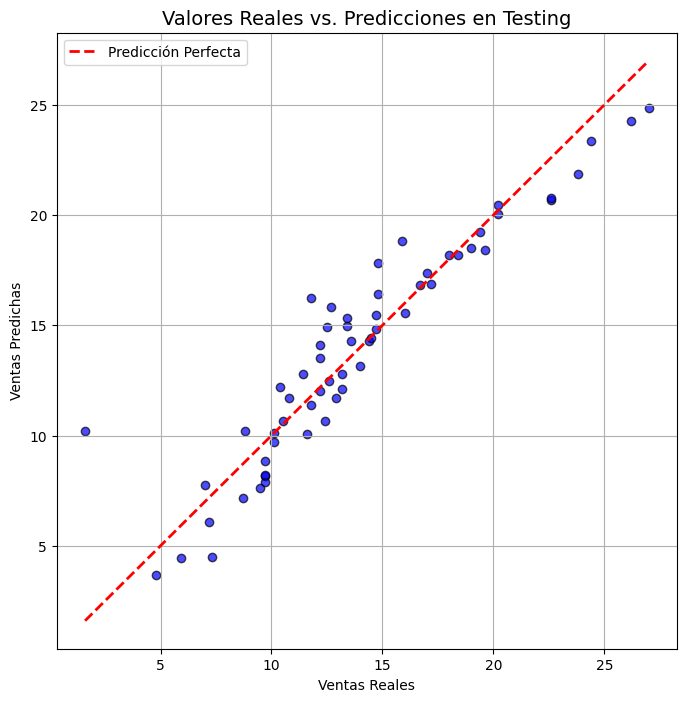

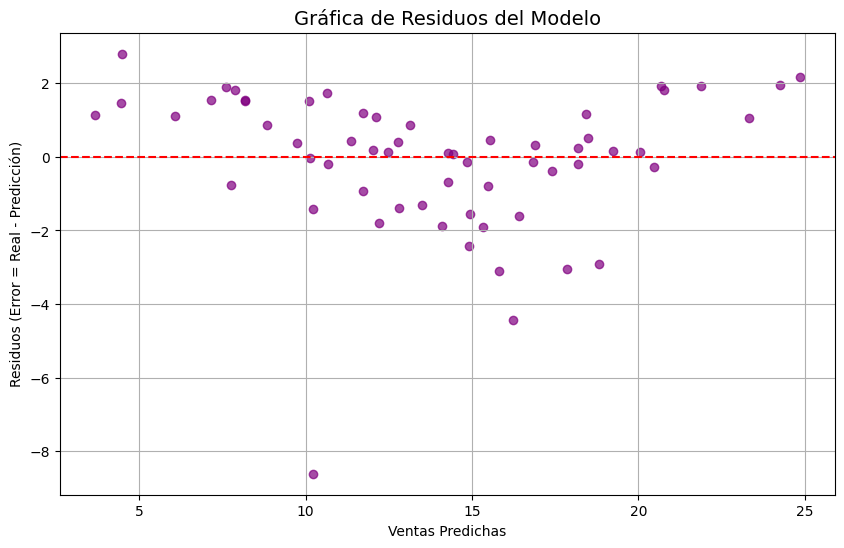

In [5]:
# Actividad 1: Regresión Lineal Múltiple
# Alumno: Víctor Manuel Mariscal Cervantes
# Maestría en Cómputo Aplicado
# Minería de Datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Carga y Partición de Datos ---
print("--- 1. Carga y Partición de Datos ---")
try:
    data = pd.read_csv('./Advertising.csv')
    print("Dataset 'Advertising.csv' cargado.")
except FileNotFoundError:
    print("Error: El archivo 'Advertising.csv' no se encontró.")
    exit()

# Particionamos el dataset en 70% entrenamiento y 30% prueba
train_data = data.sample(frac=0.7, random_state=42)
test_data = data.drop(train_data.index)

print(f"Datos de entrenamiento: {len(train_data)} (70%)")
print(f"Datos de testing: {len(test_data)} (30%)\n")

# --- 2. Preparación de Datos para Cálculo Matricial ---
# Preparamos las matrices para el conjunto de entrenamiento
X_train_raw = train_data[['TV', 'Radio']].values
y_train = train_data['Sales'].values

# Añadimos una columna de unos a X_train para el término de la intersección (α)
# Esto crea la matriz de diseño X
X_train_b = np.c_[np.ones((len(X_train_raw), 1)), X_train_raw]


# --- 3. Cálculo de Coeficientes ---
# Se resuelve el sistema de ecuaciones para los coeficientes (α, β1, β2)
# usando la Ecuación Normal: β = (X'X)^(-1) * X'y
print("--- 2. Entrenando el modelo ---")

try:
    # Calculamos los coeficientes (betas)
    xtx = X_train_b.T.dot(X_train_b)
    xtx_inv = np.linalg.inv(xtx)
    xty = X_train_b.T.dot(y_train)
    beta_vector = xtx_inv.dot(xty)

    # Extraemos los parámetros individuales
    alpha = beta_vector[0]
    beta_tv = beta_vector[1]
    beta_radio = beta_vector[2]

    print("Modelo ajustado. Parámetros encontrados:")
    print(f"  - Intersección (α): {alpha:.4f}")
    print(f"  - Coeficiente para TV (β1): {beta_tv:.4f}")
    print(f"  - Coeficiente para Radio (β2): {beta_radio:.4f}")
    print(f"Modelo final: Sales = {alpha:.4f} + {beta_tv:.4f}*TV + {beta_radio:.4f}*Radio\n")

except np.linalg.LinAlgError:
    print("Error: No se pudo calcular la inversa de la matriz (X'X).")
    exit()


# --- 4. Evaluación de Bondad de Ajuste (en conjunto de entrenamiento) ---
print("--- 3. Evaluando el ajuste en los datos de entrenamiento ---")
# Hacemos predicciones sobre el conjunto de entrenamiento
y_pred_train = X_train_b.dot(beta_vector)

# Calculamos el Coeficiente de Determinación (R²) manualmente
ss_res_train = np.sum((y_train - y_pred_train)**2)
ss_tot_train = np.sum((y_train - np.mean(y_train))**2)
r_cuadrado = 1 - (ss_res_train / ss_tot_train)

print(f"Coeficiente de Determinación (R²) en Entrenamiento: {r_cuadrado:.4f}")
print(f"-> El {r_cuadrado:.2%} de la variabilidad de las ventas es explicada por el modelo.\n")


# --- 5. Predicciones y Evaluación (en conjunto de testing) ---
print("--- 4. Evaluando el modelo con datos nuevos (testing) ---")
# Preparamos las matrices para el conjunto de prueba
X_test_raw = test_data[['TV', 'Radio']].values
y_test = test_data['Sales'].values
X_test_b = np.c_[np.ones((len(X_test_raw), 1)), X_test_raw]

# Realizamos las predicciones con los coeficientes ya calculados
y_pred_test = X_test_b.dot(beta_vector)

# Calculamos el Error Residual Estándar en Ratio (RSE%)
residuos_test = y_test - y_pred_test
n_test = len(y_test)
p = X_test_raw.shape[1] # Número de predictores (2)
grados_libertad = n_test - p - 1
rse = np.sqrt(np.sum(residuos_test**2) / grados_libertad)
rse_ratio = (rse / np.mean(y_test)) * 100

print(f"Error Residual Estándar (RSE) en Testing: {rse:.4f}")
print(f"Error Residual Estándar en Ratio (RSE%): {rse_ratio:.2f}%")
print(f"-> El error promedio de predicción en datos nuevos es del {rse_ratio:.2f}%.\n")


# --- Gráficas para el Análisis Visual ---
print("--- 5. Generando Gráficas de Diagnóstico ---")

# Gráfica 1: Comparación de Valores Reales vs. Predichos
# Es la mejor forma de ver el rendimiento general en un modelo de regresión múltiple.
# Si los puntos se alinean cerca de la diagonal, el modelo es preciso.
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_test, alpha=0.7, edgecolors='k', c='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predicción Perfecta')
plt.title('Valores Reales vs. Predicciones en Testing', fontsize=14)
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.legend()
plt.grid(True)
plt.show()

# Gráfica 2: Análisis de Residuos
# Ayuda a verificar si los errores son aleatorios, una suposición clave en la regresión lineal.
# Lo ideal es no ver ningún patrón o forma clara en la distribución de los puntos.
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuos_test, color='purple', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfica de Residuos del Modelo', fontsize=14)
plt.xlabel('Ventas Predichas')
plt.ylabel('Residuos (Error = Real - Predicción)')
plt.grid(True)
plt.show()

